# Read in and get an overview of the data

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [83]:
road_acc=pd.read_csv('road-accidents.csv',delimiter='|',header=9)
road_acc.head(5)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [84]:
road_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [85]:
road_acc.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


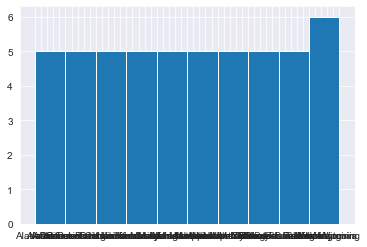

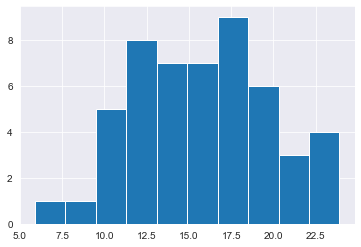

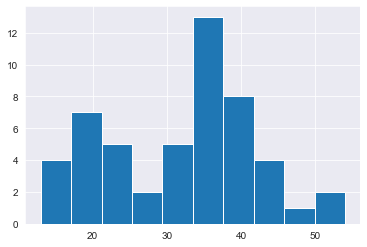

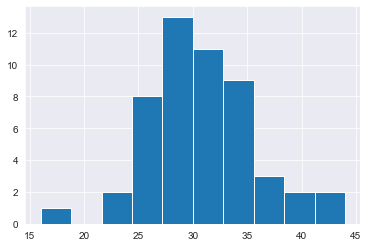

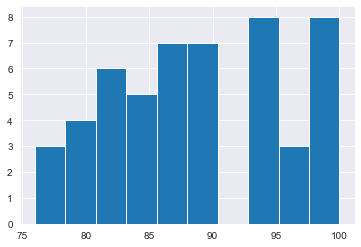

In [86]:
for i in road_acc.columns:
    fig=plt.figure()
    fig=road_acc[i].hist()


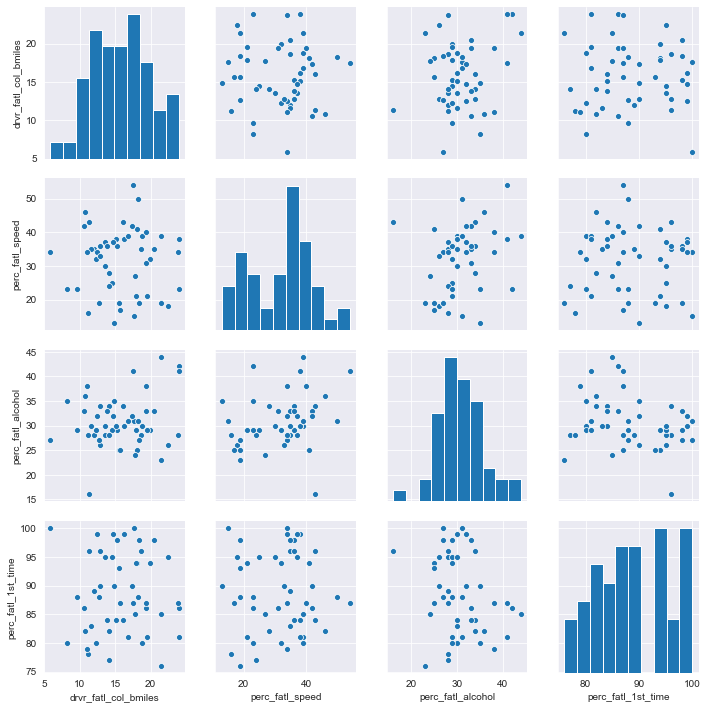

In [87]:
sns.pairplot(road_acc)

# Quantify the association of features and accidents

In [88]:
road_acc.corr()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


# Fit a multivariate linear regression

In [89]:
from sklearn.linear_model import LinearRegression
X=road_acc.drop(['state',"drvr_fatl_col_bmiles"],axis=1).values
y=road_acc.drvr_fatl_col_bmiles.values

In [90]:
ml=LinearRegression().fit(X,y)

In [91]:
ml.coef_

array([-0.04180041,  0.19086404,  0.02473301])

# Perform PCA on standardized data

In [92]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.decomposition import PCA
pc=PCA(n_components=2)

In [93]:
scaled=sc.fit_transform(X)

In [94]:
pca_result=pc.fit_transform(scaled)

In [95]:
pc.explained_variance_ratio_

array([0.4567308 , 0.33796706])

([<matplotlib.axis.XTick at 0x214892d00c8>,
 <a list of 3 Text major ticklabel objects>)

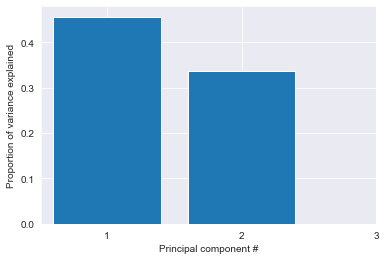

In [96]:
plt.bar(range(1, pc.n_components_ + 1),  pc.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# Visualize the first two principal components

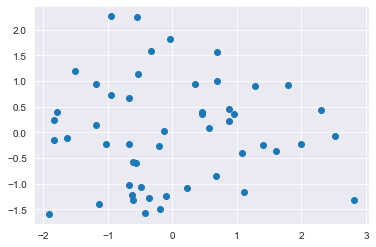

In [97]:
plt.scatter(pca_result[:,0],pca_result[:,1])


# Find clusters of similar states in the data

In [98]:
#using Kmeans clustring

In [99]:
from sklearn.cluster import KMeans

In [100]:
error=[]
for i in range(1,20):
    ml=KMeans(n_clusters=i)
    ml.fit(scaled)
    error.append(ml.inertia_)

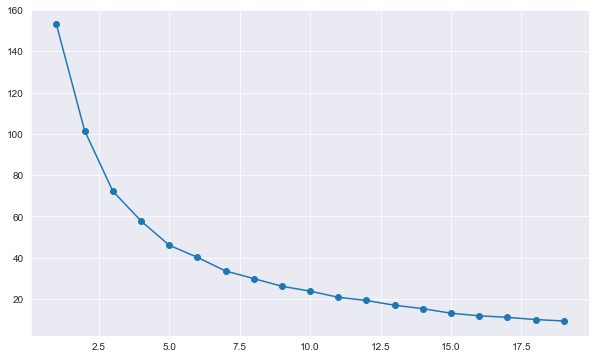

In [101]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20,1),error,marker='o')

# KMeans to visualize clusters in the PCA scatter plot

In [102]:
ml=KMeans(n_clusters=3)

In [103]:
labels=ml.fit_predict(scaled)

In [106]:
labeled_clust=road_acc.copy()
labeled_clust['clusters']=labels


No handles with labels found to put in legend.


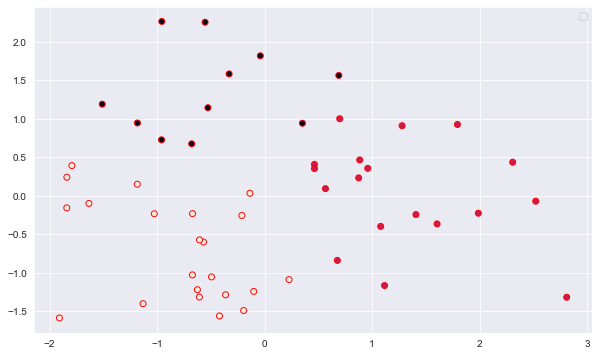

In [108]:
plt.figure(figsize=(10,6))
plt.scatter(pca_result[:,0],pca_result[:,1],c=labels,edgecolors='red', alpha = 10,)
plt.legend()


# Visualize the feature differences between the clusters

In [109]:
labeled_clust.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,clusters
0,Alabama,18.8,39,30,80,1
1,Alaska,18.1,41,25,94,2
2,Arizona,18.6,35,28,96,2
3,Arkansas,22.4,18,26,95,2
4,California,12.0,35,28,89,2


In [112]:
melt_car = pd.melt(labeled_clust, id_vars=['clusters'],
                  var_name='measurement', value_name='percent',
                  value_vars=['perc_fatl_speed', 'perc_fatl_alcohol','perc_fatl_1st_time'])

In [113]:
melt_car

,clusters,measurement,percent
0,1,perc_fatl_speed,39
1,2,perc_fatl_speed,41
2,2,perc_fatl_speed,35
3,2,perc_fatl_speed,18
4,2,perc_fatl_speed,35
...,...,...,...
148,0,perc_fatl_1st_time,88
149,1,perc_fatl_1st_time,86
150,2,perc_fatl_1st_time,87
151,1,perc_fatl_1st_time,84


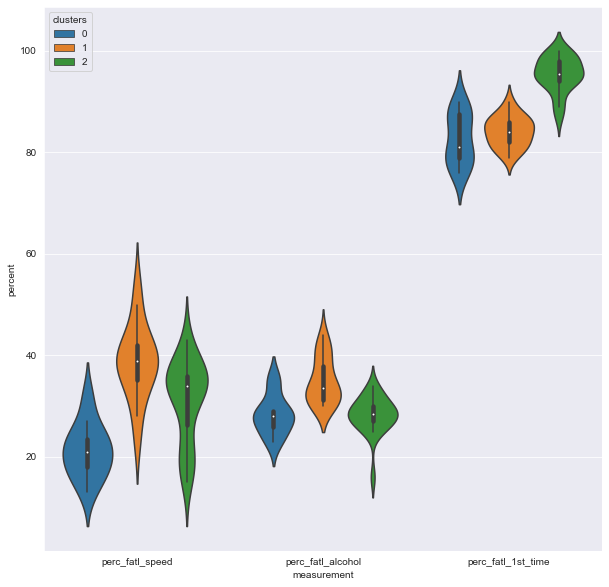

In [115]:
plt.figure(figsize=(10,10))
sns.violinplot(x='measurement',y='percent',data=melt_car,hue='clusters')

# Compute the number of accidents within each cluster

In [122]:
miles=driven=pd.read_csv('miles-driven.csv',delimiter='|')

In [123]:
miles

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784
5,Colorado,46606
6,Connecticut,31197
7,Delaware,9028
8,District of Columbia,3568
9,Florida,191855


In [124]:
road_acc.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [139]:
car_acc_mile=labeled_clust.merge(miles,on='state')

In [140]:
car_acc_mile.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,clusters,million_miles_annually
0,Alabama,18.8,39,30,80,1,64914
1,Alaska,18.1,41,25,94,2,4593
2,Arizona,18.6,35,28,96,2,59575
3,Arkansas,22.4,18,26,95,2,32953
4,California,12.0,35,28,89,2,320784


In [141]:
car_acc_mile['no_acc_peryr']=(car_acc_mile.drvr_fatl_col_bmiles/1000)*car_acc_mile.million_miles_annually

In [143]:
car_acc_mile.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,clusters,million_miles_annually,no_acc_peryr
0,Alabama,18.8,39,30,80,1,64914,1220.3832
1,Alaska,18.1,41,25,94,2,4593,83.1333
2,Arizona,18.6,35,28,96,2,59575,1108.0950
3,Arkansas,22.4,18,26,95,2,32953,738.1472
4,California,12.0,35,28,89,2,320784,3849.4080


In [150]:
car_acc_mile.groupby('clusters')['no_acc_peryr'].agg(['count', 'mean', 'sum'])

,count,mean,sum
clusters,,,
0,11,860.505945,9465.5654
1,18,911.406439,16405.3159
2,22,898.378595,19764.3291


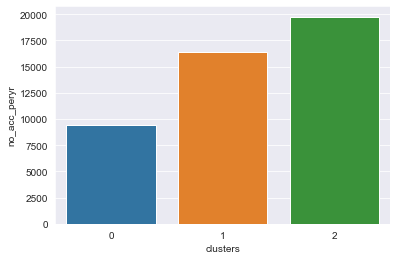

In [155]:
sns.barplot(x='clusters',y='no_acc_peryr', data=car_acc_mile, estimator=sum, ci=None)

# Make a decision when there is no clear right choice

As we can see, there is no obvious correct choice regarding which cluster is the most important to focus on. Yet, we can still argue for a certain cluster and motivate this using our findings above. Which cluster do you think should be a focus for policy intervention and further investigation?

In [ ]:
cluster_num = 0